In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df = pd.read_csv('data/StdPfmn.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X = df.drop(columns=['math score'], axis=1)

In [6]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y = df['math score']

In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [20]:
#Create column transformer

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [21]:
X = preprocessor.fit_transform(X)

In [22]:
X.shape

(1000, 19)

Separate dataset into train and test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

Create an Evaluate Function to give all metrics after model Training

In [28]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [33]:
models = {
    "KNeighborsRegressor": KNeighborsRegressor(),
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "Lasso": Lasso(),
    "Ridge": Ridge()
}


In [34]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("1. Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("2. Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("3. R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('*'*35)
    print('\n')



KNeighborsRegressor
Model performance for Training set
1. Root Mean Squared Error: 7.2530
2. Mean Absolute Error: 4.5167
3. R2 Score: 0.8555
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2530
- Mean Absolute Error: 5.6210
- R2 Score: 0.7838
***********************************


LinearRegression
Model performance for Training set
1. Root Mean Squared Error: 5.3960
2. Mean Absolute Error: 4.2671
3. R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803
***********************************


DecisionTreeRegressor
Model performance for Training set
1. Root Mean Squared Error: 8.4196
2. Mean Absolute Error: 0.0187
3. R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.4196
- Mean Absolute Error: 6.7000
- R2 Score: 0.7087
***********************************


RandomForestRegre

In [54]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
#pred_df=pd.DataFrame({'Model Name':model_list,'Predicted Value':r2_list})
#pred_df

,Model Name,R2_Score
8,Ridge,0.880593
1,LinearRegression,0.880345
3,RandomForestRegressor,0.855385
5,CatBoostRegressor,0.851632
6,AdaBoostRegressor,0.844432
7,Lasso,0.825320
4,XGBRegressor,0.821589
0,KNeighborsRegressor,0.783813
2,DecisionTreeRegressor,0.708677


Ridge

In [42]:
r_model = Ridge(fit_intercept=True)
r_model = r_model.fit(X_train, y_train)
y_pred = r_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.06


Text(0, 0.5, 'Predicted')

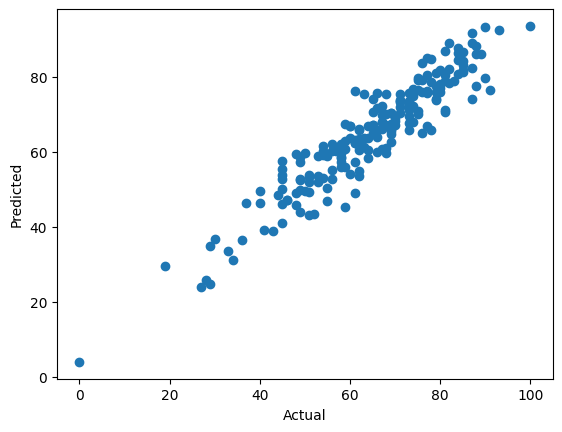

In [43]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

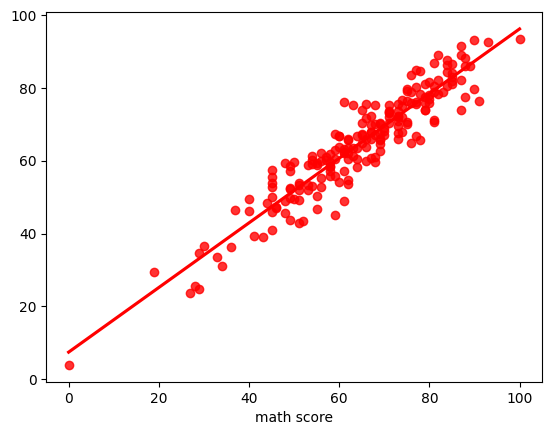

In [44]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

Difference between Actual and Predicted Values


In [45]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504
